<h2>Assignment 2 Data Analysis in Python</h2>
<p>Drew Caldwell 2/1/2024 Indiana University-Kokomo</p>
<p>This project for CSCI-C490 uses pandas and MatPlotLib to help gather visual information and gain information from
us doing so. Our data from the Rural Atlas contains all counties in the United States and has values such as the poverty rates, house hold incomes, deep poverty rates, and children in poverty rates to name a few. It was obtained by downloading the zip file containing csv's from, "data.gov". We will utilize a Bar Graph, a histogram, and pie charts to gain information.</p>

<h3>Link to dataset</h3>
<p>https://catalog.data.gov/dataset/atlas-of-rural-and-small-town-america </p>

<h3>Foundations for the project</h3>
<p>Import pandas and matplotlib. If this does not work use pip install to install pandas and matplotlib </p>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

<p>Declare a variable as the url to get access quickly and create the df data field with our csv. </p>

In [3]:
# Pull the data from GitHub
url = "https://raw.githubusercontent.com/drewdcaldwell/CSCI-C490_MatplotLib_Project/main/Rural_Atlas_Update24/Income.csv"
df = pd.read_csv(url, encoding='latin1')

<p>Test the output of the data field by outputting the first few rows and columns of data</P>

In [4]:
# Test Output
df.head()

,FIPS,State,County,Attribute,Value
0,0,US,United States,Median_HH_Inc_ACS,69021.000000
1,0,US,United States,PerCapitaInc,37638.000000
2,0,US,United States,Poverty_Rate_0_17_ACS,17.046705
3,0,US,United States,Poverty_Rate_ACS,12.631850
4,0,US,United States,Deep_Pov_All,5.777385


<p>In the data set FIPS is a unique number given to each county in the United States. The State is the state that the county resides in. County is the county name. The Attribute column is very important to us. The Attribute column is what was measured, above Median_HH_Inc_ACS is the Median household income from 2017-2021. PerCapitaInc, is the Income per Capita. Poverty_Rate_0_17_ACS is the poverty rate for children of ages 0 - 17. Poverty_Rate_ACS is the poverty rate from 2017-2021, and Deep_Pov_All is the Deep poverty rate of all ages for 2021 in the given county.</p>

<p>In this step I will give a unique integer to each county variable. This is not neccessary looking back now, but it is one way for me to quickly look back at some of the values within other charts and ensure that the data pulled is the correct data for the plot.</P>

In [5]:
# Test output some of the values to make sure that they are correctly formatted.

# I chose Blackford County for this just because it is where I grew up

blackford = 18009

blackford_values = df[df['FIPS'] == blackford]

Test the output of one of the counties data

In [6]:
# Test output some of the values
blackford_values

,FIPS,State,County,Attribute,Value
9328,18009,IN,Blackford,Median_HH_Inc_ACS,45080.000000
9329,18009,IN,Blackford,PerCapitaInc,26044.000000
9330,18009,IN,Blackford,Poverty_Rate_0_17_ACS,20.794653
9331,18009,IN,Blackford,Poverty_Rate_ACS,18.210649
9332,18009,IN,Blackford,Deep_Pov_All,10.056752
9333,18009,IN,Blackford,Deep_Pov_Children,16.895655
9334,18009,IN,Blackford,NumAll_inPOV_ACS,2182.000000
9335,18009,IN,Blackford,PCTPOV017,20.000000
9336,18009,IN,Blackford,POV017,521.000000
9337,18009,IN,Blackford,MedHHInc,47553.000000


<p>As you can see there are many different Attributes. We will be using Poverty_Rate_ACS which is the poverty rate from 2017-2021, and Median_HH_Inc_ACS which is the median household income from 2017-2021.</p>

<h3>Data Selection</h3>

<p> Now I would like to narrow our table down to 10 counties in the surrounding Kokomo area. These counties are Blackford, Grant, Madison, Howard, Cass, Tipton, Wells, Clinton, Wabash, and Miami. This will helpfully make the data more meaningful to us since we are doing the research in Kokomo, and these counties are all within an hour of IU-Kokomo, and are counties that I have lived in or spent a large amount of my life in.</p>

In [7]:
# Filter the dataset for rows with the State == "IN"
# This will give us only counties that are in Indiana
indiana_counties = df[df['State'] == 'IN']

# Specify the desired counties, these are the 10 counties we listed before
desired_counties = ['Blackford', 'Wells',
                     'Grant', 'Howard', 
                     'Madison', 'Miami', 
                     'Cass', 'Tipton',
                     'Clinton','Wabash']

# Filter the Indiana counties dataset for the desired counties
selected_counties = indiana_counties[indiana_counties['County'].isin(desired_counties)]

# Filter the selected counties dataset to get the rows with Poverty_Rate_ACS attribute
# The Poverty Rate ACS is the average poverty rate from 2017 - 2021
pvrty_rate_rows = selected_counties[selected_counties['Attribute'] == 'Poverty_Rate_ACS']

# Extract only the County and values columns
counties_values = pvrty_rate_rows[['County', 'Value']]

# Sort the Poverty_Rate_ACS values from low to high
counties_values = counties_values.sort_values(by='Value')



<h3>Horizontal Bar Graph </h3>
<p>This is our first plot that we will use. We will compare ten counties within an hour of IU-Kokomo with a more rural location. Within the counties we will look at the Poverty_Rate_ACS from the csv attribute which is the average poverty rate from 2017 to 2021. We will utilize a horizontal bar graph and sort the values to see how they rank amongst others.</p>

<p>On the graph the counties are listed on the y axis, and the poverty rate as a percentage is along the x axis. The higher the poverty rate, the higher the graph will go in the positive x direction. The poverty rate variable is the % of people that fall below the poverty line within a given area. The poverty line is the income deemed adequate to live in a given area.</p>

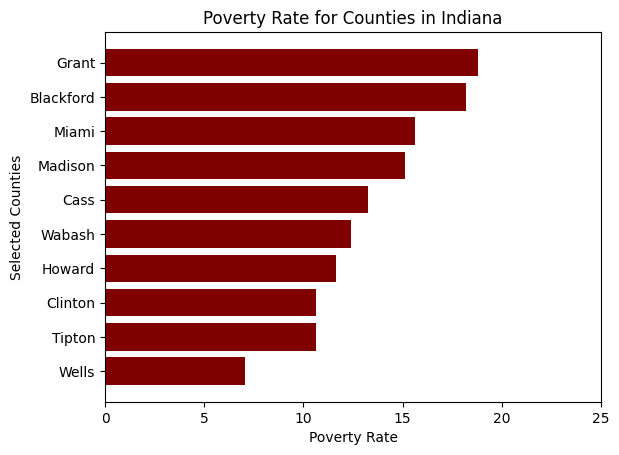

In [8]:
# Create a horizontal bar graph
plt.barh(counties_values['County'], counties_values['Value'], color='maroon')
# label the x-axis
plt.xlabel('Poverty Rate')
# label the y-axis
plt.ylabel('Selected Counties')
# Title the graph
plt.title('Poverty Rate for Counties in Indiana')
# Adjusting the scale size
plt.xlim(0, 25)

# Show the bar graph
plt.show()

<p>From the bar graph we see that Wells county has the lowest poverty rate of the ten counties we have decided to observe. The highest was Grant County, which is interesting since Grant County is similar to Howard in terms of some aspects. Grant and Howard both have Universities, and a similar county seat. However, what I do think that Howard has that Grant does not is the FCA Chrysler Plant. Grant County has a General Motors plant that provides a lot of jobs, but I think that the FCA plant is bigger and serves more of Howard county.</p>

<p>I was surprises to see Grant on top, but more so, Wells, Tipton, and Clinton are all relatively rural counties. They all have a decent sized county seat but overall do not have a major city. I thought that it was intersting because these 3 are more comparable to Miami, and Cass, which are on kind of the opposite side of the small bar graph.</p>

<h3>Histogram</h3>
<p> Now we will use a histogram to show the distribution of the median household income for counties in Indiana. Doing this will show us where most of the counties median household incomes lay, allowing us to make a bigger conjecture about the median household income for the state, and see where a specific countie lies compared to others on the histogram.</p>

<p>On the histogram, we are looking at the median household income for families in every county in Indiana. The higher the frequency the more common an income within that range is.</p>

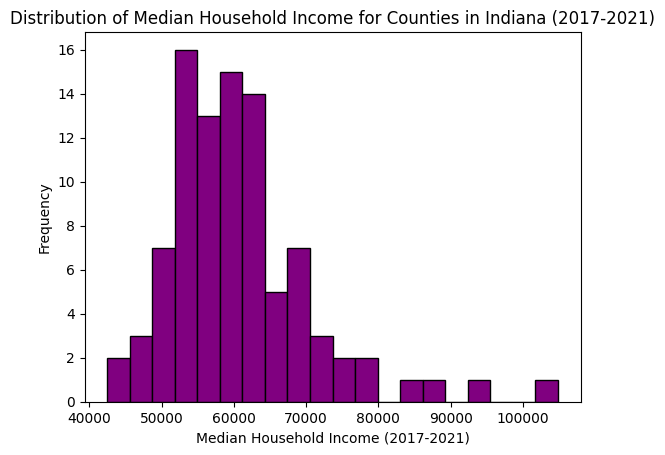

In [20]:
# Filter the Indiana counties dataset to get the rows with "Median_HH_Inc_ACS" attribute
# indiana_counties is from the hbar chart, it gets rid of all counties whose State Column does not equal "IN"
income_rows = indiana_counties[indiana_counties['Attribute'] == 'Median_HH_Inc_ACS']

# Extract 'Value' column (Median Household Income)
income_values = income_rows['Value']

# Create a histogram
plt.hist(income_values, bins=20, color='purple', edgecolor='black')
plt.xlabel('Median Household Income (2017-2021)')
plt.ylabel('Frequency')
plt.title('Distribution of Median Household Income for Counties in Indiana (2017-2021)')

plt.show()


In this histogram we can see that the most of the household incomes from 2017 - 2021 fall around 60,000 a year. We also see that some counties median income is approaching $100,000/year and one select county in Indiana's median household income is actually over $100,000. This is quite interesting since so many fall around $60,000, I assume that these that the median is over $85,000 (5 counties), are somewhere in the Indianapolis Metropolatain Area. These counties, such as Hamilton, have this capability. I could also see maybe one or two from a suburb of Fort Wayne, Evansville, or a large city that has the capability of commuting into town.

In [17]:
# Filter the Indiana counties dataset to get the rows with Median_HH_Inc_ACS attribute
income_rows = indiana_counties[indiana_counties['Attribute'] == 'Median_HH_Inc_ACS']

# Extract County and Value columns (Median Household Income)
income_values = income_rows[['County', 'Value']]

# Sort the values from high to low
income_values = income_values.sort_values(by='Value', ascending=False)

# Select the top 5 counties 
top_5_counties = income_values.head(5)

# Display the result
print("Top 5 Counties with the Highest Median Household Income in Indiana:")
print(top_5_counties)


Top 5 Counties with the Highest Median Household Income in Indiana:
          County     Value
9640    Hamilton  104858.0
9341       Boone   94843.0
9679   Hendricks   87961.0
10394    Warrick   85613.0
9653     Hancock   79126.0


<p>From our histogram observations and assumptions we see that we were correct. The highest median household income county in Indiana is Hamilton which is a suburb of Indianapolis county.</p>
<p>Boone, Hendricks, and Hancock are also suburbs of Indianapolis. Warrick is a suburban county of Evansville in Southern Indiana. This is quite interesting since these are what we were expecting.</p>

<h3>Pie Charts</h3>
<p>Next I will compare the two counties with the highest poverty rate, Blackford and Grant, and look into the race distribution through two different pie charts. I will set them up side by side so that they are easy to compare as well.</p>
<p>The data here is from the same resource but is in a different ccsv file so we have to pull that from GitHub to begin</p>
<p>The data we looked at before only looked into the Income related variables. This csv file looks at the Education, and Race Distribution in all counties.</p>

In [18]:
# New data link
people_url = "https://raw.githubusercontent.com/drewdcaldwell/CSCI-C490_MatplotLib_Project/main/Rural_Atlas_Update24/People.csv"

# Load the People.csv data into a DataFrame
people_df = pd.read_csv(people_url, encoding='latin1')

# Test Ouput 
people_df.head()

,FIPS,State,County,Attribute,Value
0,0,US,United States,Age65AndOlderNum2020,5.413663e+07
1,0,US,United States,Age65AndOlderPct2020,1.633331e+01
2,0,US,United States,AsianNonHispanicNum2020,1.961872e+07
3,0,US,United States,AsianNonHispanicPct2020,5.919071e+00
4,0,US,United States,AvgHHSize,2.600000e+00


<p>Get the data that we are interested in. Which is Blackford and Grant counties, and the different race attributes that are offered. We will also rename the attributes since they are not very user friendly. From their we will calculate the sum because we need it for finding the pie chart percentages.</p>

In [11]:
# Filter data for Grant County and Blackford County in Indiana
grant_county_data = people_df[(people_df['State'] == 'IN') & (people_df['County'] == 'Grant')]
wells_county_data = people_df[(people_df['State'] == 'IN') & (people_df['County'] == 'Wells')]

# Define race-related attribute names
race_attributes = ['HispanicNum2020', 'AsianNonHispanicNum2020', 'BlackNonHispanicNum2020', 'WhiteNonHispanicNum2020']
race_titles = ['Hispanic', 'Asian', 'African-American', 'White']

# Extract relevant rows for the pie chart based on the Attribute column
grant_race_data = grant_county_data[grant_county_data['Attribute'].isin(race_attributes)]
wells_race_data = wells_county_data[wells_county_data['Attribute'].isin(race_attributes)]

# Sum the values for each race category
grant_race_totals = grant_race_data.groupby('Attribute')['Value'].sum()
wells_race_totals = wells_race_data.groupby('Attribute')['Value'].sum()

<p>Now we will move on into potting our pie charts</p>

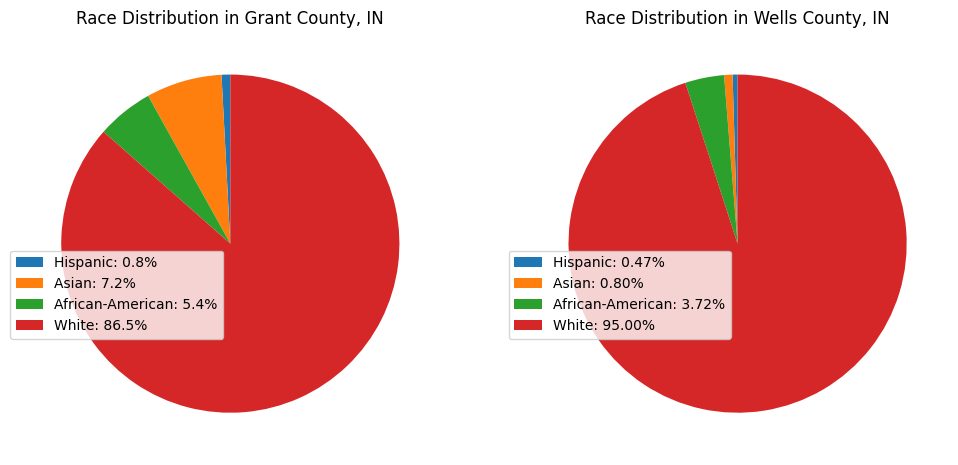

In [12]:
# Plot side-by-side pie charts with customized titles and improved spacing
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Grant County Pie Chart
grant_pie = axes[0].pie(grant_race_totals, startangle=90)
axes[0].set_title('Race Distribution in Grant County, IN')
grant_legend = axes[0].legend(grant_pie[0], [f'{title}: {percentage:.1f}%' for title, percentage in zip(race_titles, grant_race_totals/sum(grant_race_totals)*100)],
                              loc="upper right", bbox_to_anchor=(0.5, 0.5))

# Blackford County Pie Chart
wells_pie = axes[1].pie(wells_race_totals, startangle=90)
axes[1].set_title('Race Distribution in Wells County, IN')
wells_legend = axes[1].legend(wells_pie[0], [f'{title}: {percentage:.2f}%' for title, percentage in zip(race_titles, wells_race_totals/sum(wells_race_totals)*100)],
                                  loc="upper right", bbox_to_anchor=(0.5, 0.5))
plt.show()


<p>From the pie chart we can tell that Grant County has a higher distribution between races than Wells County. Although not sure if this plays a role in the overall high poverty, for the most part they are similar with the majority being white. This difference in the poverty rate has to be a greater factor than the race distribution since they are so similar.</p>

<p>For fun, I decided to also compare the highest median household income, and the highest poverty rate in our 10 counties we selected. So, I created another pie chart with Hamilton County, Indiana and Grant County, Indiana. </p>

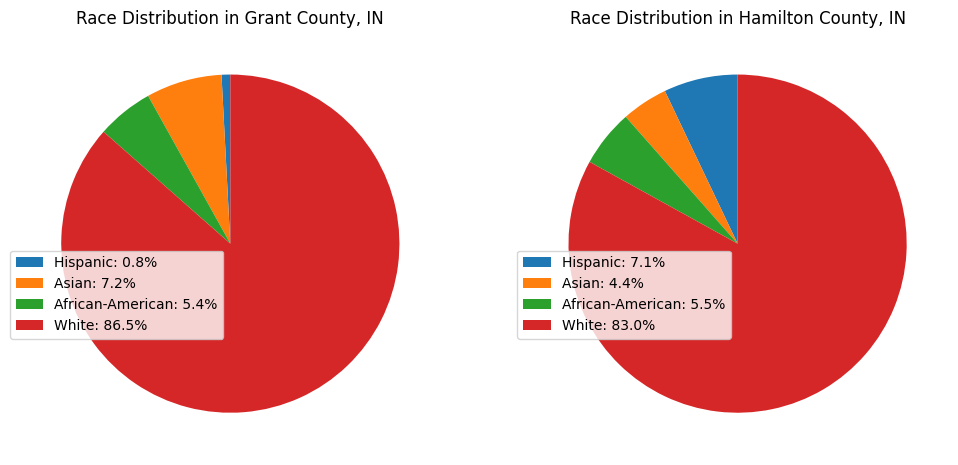

In [19]:
# Filter data for Hamilton County in Indiana
hamilton_county_data = people_df[(people_df['State'] == 'IN') & (people_df['County'] == 'Hamilton')]

# Extract relevant rows for the pie chart based on the Attribute column
hamilton_race_data = hamilton_county_data[hamilton_county_data['Attribute'].isin(race_attributes)]

# Sum the values for each race category
hamilton_race_totals = hamilton_race_data.groupby('Attribute')['Value'].sum()

# Plot side-by-side pie charts with customized titles and improved spacing
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Grant County Pie Chart
grant_pie = axes[0].pie(grant_race_totals, startangle=90)
axes[0].set_title('Race Distribution in Grant County, IN')
grant_legend = axes[0].legend(grant_pie[0], [f'{title}: {percentage:.1f}%' for title, percentage in zip(race_titles, grant_race_totals/sum(grant_race_totals)*100)],
                              loc="upper right", bbox_to_anchor=(0.5, 0.5))

# Hamilton County Pie Chart
hamilton_pie = axes[1].pie(hamilton_race_totals, startangle=90)
axes[1].set_title('Race Distribution in Hamilton County, IN')
hamilton_legend = axes[1].legend(hamilton_pie[0], [f'{title}: {percentage:.1f}%' for title, percentage in zip(race_titles, hamilton_race_totals/sum(hamilton_race_totals)*100)],
                                  loc="upper right", bbox_to_anchor=(0.5, 0.5))

plt.show()


<p>Again, there is not a major difference between the race distribution in Grant and Hamilton County. We see that in Hamilton County there is a higher hispanic distribution. However, again the majority is white. There has to be a differencing factor from race, and median household income/Poverty Rate which are closely related. </p>

<h2>Summary of Report</h2>
<p>We saw that of 10 of the counties that Drew Caldwell has been in or lived around his whole life that Grant County had the highest poverty rate, and Wells County has the lowest. We saw that the counties with the highest median income surround Indianapolis except for one which resides on the outside of Evansville. Then we saw that the race distribution in Grant and Wells county was very similar, which was interestng considering the difference in poverty rate. So, we then looked at Hamilton county and Grant county's race distribution and again saw that the majority was white. Showing that there must be a different factor that is causing the gap in pay/poverty rate. If I were to make an educated guess, I think that it has to do with the cost of living difference between the two counties and the education distribution. This would be quite interesting to see if either of these factors play a role in the difference.</p>
<p>This project was quite enjoyable to do and learn. I enjoyed looking at the counties around Kokomo that I have lived in my whole life.</p>